In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [2]:
input_dir = '/data/member/twgoo/COVID-19/trajectory_analysis/'
policy_df = pd.read_csv(input_dir + 'oxford_korea.csv', index_col=0)

In [75]:
policy_df = policy_df.iloc[:169]

# Descriptive statististics using Korea policy

In [76]:
descriptive_policy = pd.DataFrame()

for i, col_name in enumerate(policy_df.iloc[:,2:-2].columns) : 
    policy = pd.DataFrame(policy_df[col_name].describe())
    descriptive_policy = pd.concat([descriptive_policy, policy], axis=1)

descriptive_policy

,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,E1_Income support,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines
count,136.000000,115.000000,139.000000,79.000000,0.0,77.000000,77.000000,169.000000,8.000000e+01,169.000000,169.000000,169.000000,138.0,169.000000,169.000000,169.000000,169.000000
mean,0.902574,0.678261,0.757794,0.764557,NaN,0.438312,0.584416,0.573964,6.666667e-01,0.275148,0.480568,0.118784,1.0,0.814596,0.795858,0.042887,0.048762
std,0.133239,0.168081,0.236744,0.149390,NaN,0.240462,0.320616,0.302031,1.117228e-16,0.249471,2.168198,0.892069,0.0,0.359780,0.379592,0.557536,0.633908
min,0.500000,0.500000,0.333333,0.600000,NaN,0.250000,0.333333,0.000000,6.666667e-01,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.500000,0.666667,0.600000,NaN,0.250000,0.333333,0.600000,6.666667e-01,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,0.000000,0.000000
50%,1.000000,0.750000,0.666667,0.800000,NaN,0.250000,0.333333,0.600000,6.666667e-01,0.500000,0.000000,0.000000,1.0,1.000000,1.000000,0.000000,0.000000
75%,1.000000,0.750000,1.000000,0.800000,NaN,0.750000,1.000000,0.800000,6.666667e-01,0.500000,0.000000,0.000000,1.0,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,NaN,0.750000,1.000000,0.800000,6.666667e-01,0.500000,10.906711,7.724276,1.0,1.000000,1.000000,7.247973,8.240799


# Codebook for the Oxford Covid-19 Government Response Tracker

***Codebook version 2.2 <br/>22 May 2020***

This document is the authoritative codebook for the Oxford Covid-19 Government Response Tracker ([GitHub repo](https://github.com/OxCGRT/covid-policy-tracker), [university website](https://www.bsg.ox.ac.uk/covidtracker)). The dataset contains 17 indicators and a miscellaneous notes field organised into four groups:
- [C - containment and closure policies](#containment-and-closure-policies)
- [E - economic policies](#economic-policies)
- [H - health system policies](#health-system-policies)
- [M - miscellaneous policies](#miscellaneous-policies)

Updates to this codebook are recorded in the [changelog](#codebook-changelog) below.

Most indicators are recorded on an ordinal scale that represents the level of strictness of the policy. Four of the indicators (E3, E4, H4 and H5) are recorded as a US dollar value of fiscal spending.

Eight of the indicators (C1-C7 and H1) also have a flag for whether they are targeted to a specific geographical region (flag=0) or whether they are a "general" policy that is applied across the whole country (flag=1). One indicator (E1) has a flag to describe whether income support is for just formal sector workers (flag=0) or whether it includes informal workers as well (flag=1).

### Containment and closure policies

| ID | Name | Description | Measurement | Coding |
| --- | --- | --- | --- | --- |
| C1 | `C1_School closing` | Record closings of schools and universities | Ordinal scale | 0 - no measures <br/>1 - recommend closing <br/>2 - require closing (only some levels or categories, eg just high school, or just public schools) <br/>3 - require closing all levels <br/>Blank - no data |
| | `C1_Flag` | | Binary flag for geographic scope | 0 - targeted <br/>1- general <br/>Blank - no data |
| C2 | `C2_Workplace closing` | Record closings of workplaces | Ordinal scale | 0 - no measures <br/>1 - recommend closing (or recommend work from home) <br/>2 - require closing (or work from home) for some sectors or categories of workers <br/>3 - require closing (or work from home) for all-but-essential workplaces (eg grocery stores, doctors) <br/>Blank - no data |
| | `C2_Flag` | | Binary flag for geographic scope | 0 - targeted <br/>1- general <br/>Blank - no data |
| C3 | `C3_Cancel public events` | Record cancelling public events | Ordinal scale | 0 - no measures <br/>1 - recommend cancelling <br/>2 - require cancelling <br/>Blank - no data |
| | `C3_Flag` | | Binary flag for geographic scope | 0 - targeted <br/>1- general <br/>Blank - no data |
| C4 | `C4_Restrictions on gatherings` | Record limits on private gatherings | Ordinal scale | 0 - no restrictions <br/>1 - restrictions on very large gatherings (the limit is above 1000 people) <br/>2 - restrictions on gatherings between 101-1000 people <br/>3 - restrictions on gatherings between 11-100 people <br/>4 - restrictions on gatherings of 10 people or less <br/>Blank - no data |
| | `C4_Flag` | | Binary flag for geographic scope | 0 - targeted <br/>1- general <br/>Blank - no data |
| C5 | `C5_Close public transport` | Record closing of public transport | Ordinal scale | 0 - no measures <br/>1 - recommend closing (or significantly reduce volume/route/means of transport available) <br/>2 - require closing (or prohibit most citizens from using it) <br/>Blank - no data |
| | `C5_Flag` | | Binary flag for geographic scope | 0 - targeted <br/>1- general <br/>Blank - no data |
| C6 | `C6_Stay at home requirements` | Record orders to "shelter-in-place" and otherwise confine to the home | Ordinal scale | 0 - no measures <br/>1 - recommend not leaving house <br/>2 - require not leaving house with exceptions for daily exercise, grocery shopping, and 'essential' trips <br/>3 - require not leaving house with minimal exceptions (eg allowed to leave once a week, or only one person can leave at a time, etc) <br/>Blank - no data |
| | `C6_Flag` | | Binary flag for geographic scope | 0 - targeted <br/>1- general <br/>Blank - no data |
| C7 | `C7_Restrictions on internal movement` | Record restrictions on internal movement between cities/regions | Ordinal scale | 0 - no measures <br/>1 - recommend not to travel between regions/cities <br/>2 - internal movement restrictions in place <br/>Blank - no data |
| | `C7_Flag` | | Binary flag for geographic scope | 0 - targeted <br/>1- general <br/>Blank - no data |
| C8 | `C8_International travel controls` | Record restrictions on international travel <br/><br/>Note: this records policy for foreign travellers, not citizens | Ordinal scale | 0 - no restrictions <br/>1 - screening arrivals <br/>2 - quarantine arrivals from some or all regions <br/>3 - ban arrivals from some regions <br/>4 - ban on all regions or total border closure <br/>Blank - no data |

### Economic policies

| ID | Name | Description | Measurement | Coding |
| --- | --- | --- | --- | --- |
| E1 | `E1_Income support` <br/>(for households) | Record if the government is providing direct cash payments to people who lose their jobs or cannot work. <br/><br/>Note: only includes payments to firms if explicitly linked to payroll/salaries | Ordinal scale | 0 - no income support <br/>1 - government is replacing less than 50% of lost salary (or if a flat sum, it is less than 50% median salary) <br/>2 - government is replacing 50% or more of lost salary (or if a flat sum, it is greater than 50% median salary) <br/>Blank - no data |
| | `E1_Flag` | | Binary flag for sectoral scope | 0 - formal sector workers only <br/>1 - transfers to informal sector workers too <br/>Blank - no data |
| E2 | `E2_Debt/contract relief` <br/>(for households) | Record if the government is freezing financial obligations for households (eg stopping loan repayments, preventing services like water from stopping, or banning evictions) | Ordinal scale | 0 - no debt/contract relief <br/>1 - narrow relief, specific to one kind of contract <br/>2 - broad debt/contract relief |
| E3 | `E3_Fiscal measures` | Announced economic stimulus spending <br/><br/>Note: only record amount additional to previously announced spending | USD | Record monetary value in USD of fiscal stimuli, includes any spending or tax cuts NOT included in E4, H4 or H5 <br/>0 - no new spending that day <br/>Blank - no data |
| E4 | `E4_International support` | Announced offers of Covid-19 related aid spending to other countries <br/><br/>Note: only record amount additional to previously announced spending | USD | Record monetary value in USD <br/>0 - no new spending that day <br/>Blank - no data |

### Health system policies

| ID | Name | Description | Measurement | Coding |
| --- | --- | --- | --- | --- |
| H1 | `H1_Public information campaigns` | Record presence of public info campaigns | Ordinal scale | 0 - no Covid-19 public information campaign <br/>1 - public officials urging caution about Covid-19 <br/>2- coordinated public information campaign (eg across traditional and social media) <br/>Blank - no data |
| | `H1_Flag` | | Binary flag for geographic scope |  0 - targeted <br/>1- general <br/>Blank - no data |
| H2 | `H2_Testing policy` | Record government policy on who has access to testing <br/><br/>Note: this records policies about testing for current infection (PCR tests) not testing for immunity (antibody test) | Ordinal scale | 0 - no testing policy <br/>1 - only those who both (a) have symptoms AND (b) meet specific criteria (eg key workers, admitted to hospital, came into contact with a known case, returned from overseas) <br/>2 - testing of anyone showing Covid-19 symptoms <br/>3 - open public testing (eg "drive through" testing available to asymptomatic people) <br/>Blank - no data |
| H3 | `H3_Contact tracing` | Record government policy on contact tracing after a positive diagnosis <br/><br/>Note: we are looking for policies that would identify all people potentially exposed to Covid-19; voluntary bluetooth apps are unlikely to achieve this | Ordinal scale | 0 - no contact tracing <br/>1 - limited contact tracing; not done for all cases <br/>2 - comprehensive contact tracing; done for all identified cases |
| H4 | `H4_Emergency investment in healthcare` | Announced short term spending on healthcare system, eg hospitals, masks, etc <br/><br/>Note: only record amount additional to previously announced spending | USD | Record monetary value in USD <br/>0 - no new spending that day <br/>Blank - no data |
| H5 | `H5_Investment in vaccines` | Announced public spending on Covid-19 vaccine development <br/><br/>Note: only record amount additional to previously announced spending | USD | Record monetary value in USD <br/>0 - no new spending that day <br/>Blank - no data |

### Miscellaneous policies

| ID | Name | Description | Measurement | Coding |
| --- | --- | --- | --- | --- |
| M1 | `M1_Wildcard` | Record policy announcements that do not fit anywhere else | Free text notes field | Note unusual or interesting interventions that are worth flagging  |

## Codebook changelog

- 22 May 2020: v2.2 changed description of E1=2 from "replacing more than 50% of lost salary" to "replacing 50% or more of lost salary"
- 11 May 2020: moved v2 codebook to GitHub


# Ordinal variable plot with cumulative and new confirmers

***Plotting version 1.0 <br/>1 July 2020***

Plots are drawn to see the relationship between the cumulative and newly confirmed information and the order policy variables.

In [124]:
column_names = []

for i, col_name in enumerate(policy_df.iloc[:,2:-2].columns) : 
    x = policy_df.iloc[:,1]
    y = policy_df[col_name].fillna(0)
    if max(y) <= 1 and max(y) != 0 :
        column_names.append(col_name)

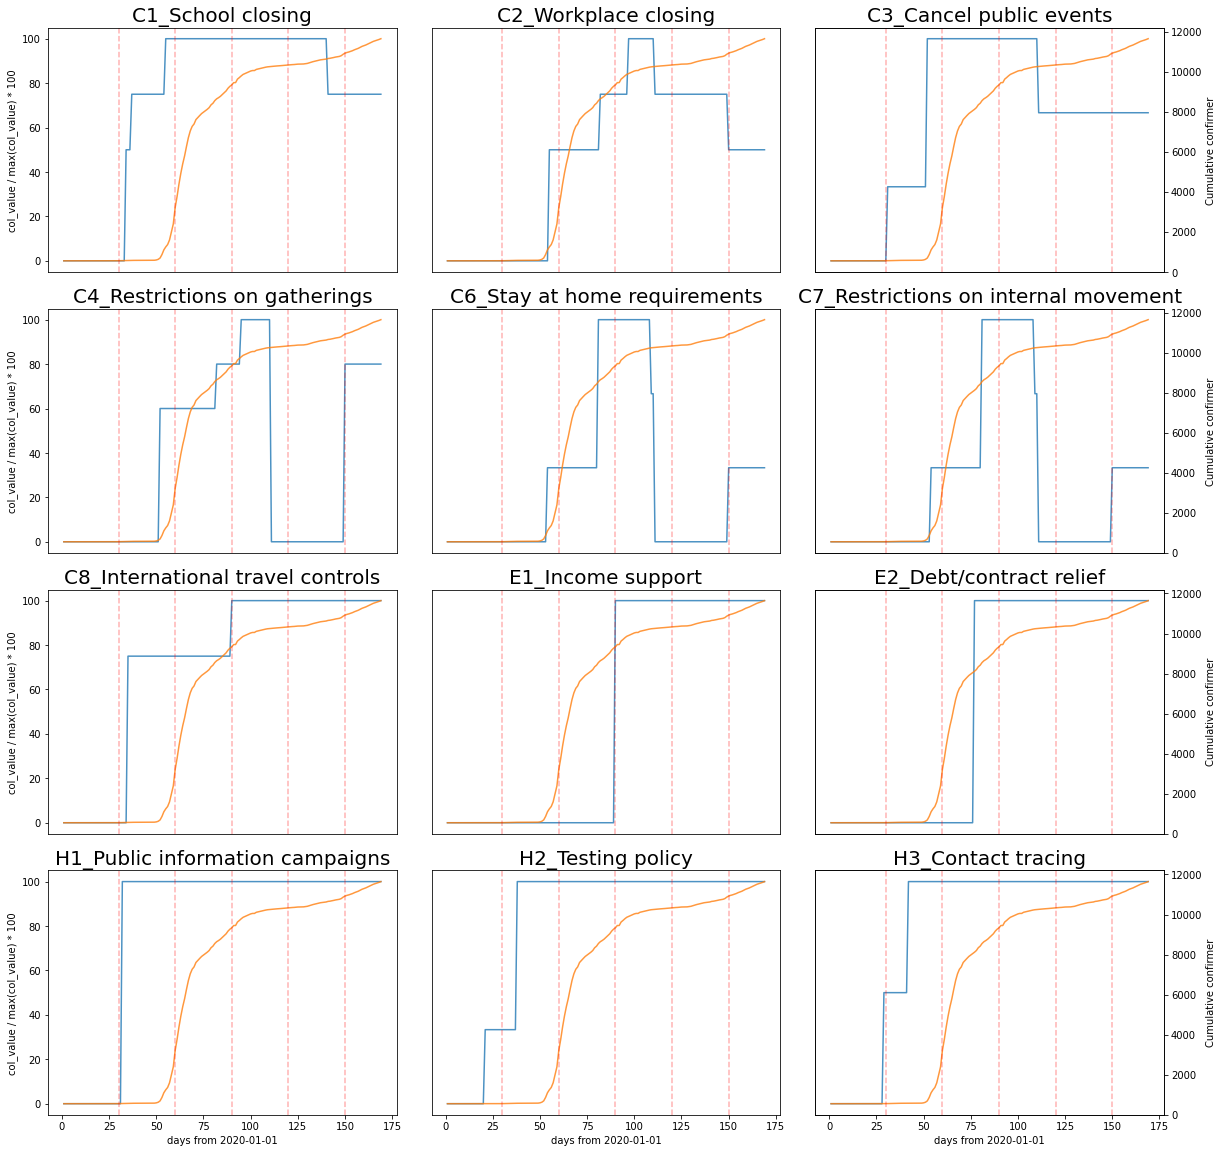

In [160]:
# fig = plt.figure(figsize=(20,20))
nrow = 4 
ncol = 3
fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(20,20))
fig.subplots_adjust(hspace=0.15, wspace=0.1)

for i, col_name in enumerate(column_names) : 
    row,col = [i//3, i%3]
#     print(row,col)
    x = policy_df.iloc[:,1]
    y = policy_df[col_name].fillna(0)
    axes[row, col].set(xlabel='days from 2020-01-01', ylabel='col_value / max(col_value) * 100')
    axes[row, col].set_title(col_name, size=20)
    axes[row, col].plot(x, y/max(y)*100, '-', alpha = 0.8) 
    y = policy_df.iloc[:,-2].fillna(0)
    axes[row, col].plot(x, y/max(y)*100, '-', alpha = 0.8) 
#     print(row,col)
    count = 30  
    if col != 0 :
        axes[row, col].yaxis.set_visible(False)
    if col == 2 :
        ax2 = axes[row, col].twinx()
        ax2.set_ylabel("Cumulative confirmer")
        ax2.set_ylim(min(y), max(y)) 
    
    if row != 3 :
        axes[row,col].xaxis.set_visible(False) 
    
    while count < max(x) :  
        axes[row, col].axvline(count , linestyle='--', color='red', alpha=0.3)
        count += 30
plt.show()

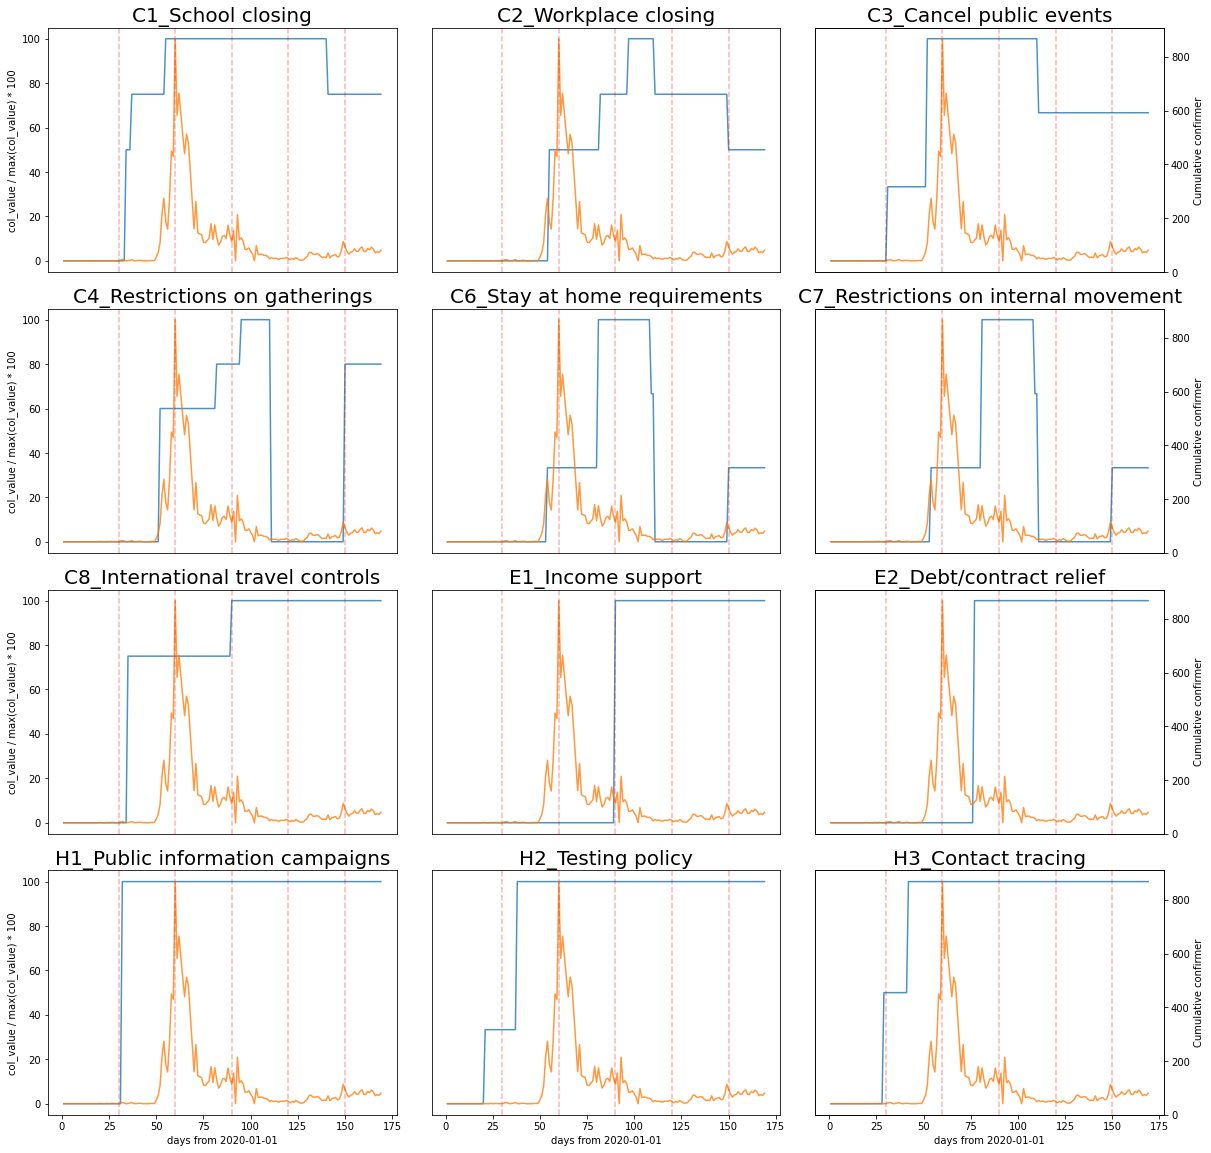

In [161]:
# fig = plt.figure(figsize=(20,20))
nrow = 4 
ncol = 3
fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(20,20))
fig.subplots_adjust(hspace=0.15, wspace=0.1)

for i, col_name in enumerate(column_names) : 
    row,col = [i//3, i%3]
#     print(row,col)
    x = policy_df.iloc[:,1]
    y = policy_df[col_name].fillna(0)
    axes[row, col].set(xlabel='days from 2020-01-01', ylabel='col_value / max(col_value) * 100')
    axes[row, col].set_title(col_name, size=20)
    axes[row, col].plot(x, y/max(y)*100, '-', alpha = 0.8) 
    y = policy_df.iloc[:,-1].fillna(0)
    axes[row, col].plot(x, y/max(y)*100, '-', alpha = 0.8) 
#     print(row,col)
    count = 30  
    if col != 0 :
        axes[row, col].yaxis.set_visible(False)
    if col == 2 :
        ax2 = axes[row, col].twinx()
        ax2.set_ylabel("Cumulative confirmer")
        ax2.set_ylim(min(y), max(y)) 
    
    if row != 3 :
        axes[row,col].xaxis.set_visible(False) 
    
    while count < max(x) :  
        axes[row, col].axvline(count , linestyle='--', color='red', alpha=0.3)
        count += 30
plt.show()

In [166]:
for i in range(len(column_names)) :
    for j in range(i+1, len(column_names)) :
        dat1 = policy_df[column_names[i]].fillna(0)
        dat2 = policy_df[column_names[j]].fillna(0)
        coef, p = spearmanr(dat1, dat2)
        if coef > 0.9:
            print(column_names[i], column_names[j])
            print('spearman correlation of '+column_names[i]+' '+column_names[j], coef)
            print('p-value of '+column_names[i]+' '+column_names[j], p)
            print("")

C4_Restrictions on gatherings C6_Stay at home requirements
spearman correlation of C4_Restrictions on gatherings C6_Stay at home requirements 0.9590727650552442
p-value of C4_Restrictions on gatherings C6_Stay at home requirements 1.9820497275036804e-93

C4_Restrictions on gatherings C7_Restrictions on internal movement
spearman correlation of C4_Restrictions on gatherings C7_Restrictions on internal movement 0.9590727650552442
p-value of C4_Restrictions on gatherings C7_Restrictions on internal movement 1.9820497275036804e-93

C6_Stay at home requirements C7_Restrictions on internal movement
spearman correlation of C6_Stay at home requirements C7_Restrictions on internal movement 1.0
p-value of C6_Stay at home requirements C7_Restrictions on internal movement 0.0

C8_International travel controls E1_Income support
spearman correlation of C8_International travel controls E1_Income support 0.9372793220888502
p-value of C8_International travel controls E1_Income support 2.410223517195989

In [175]:
import matplotlib.pyplot as plt 
import seaborn as sns  

In [177]:
data = policy_df.loc[:,column_names]
data = data.fillna(0)

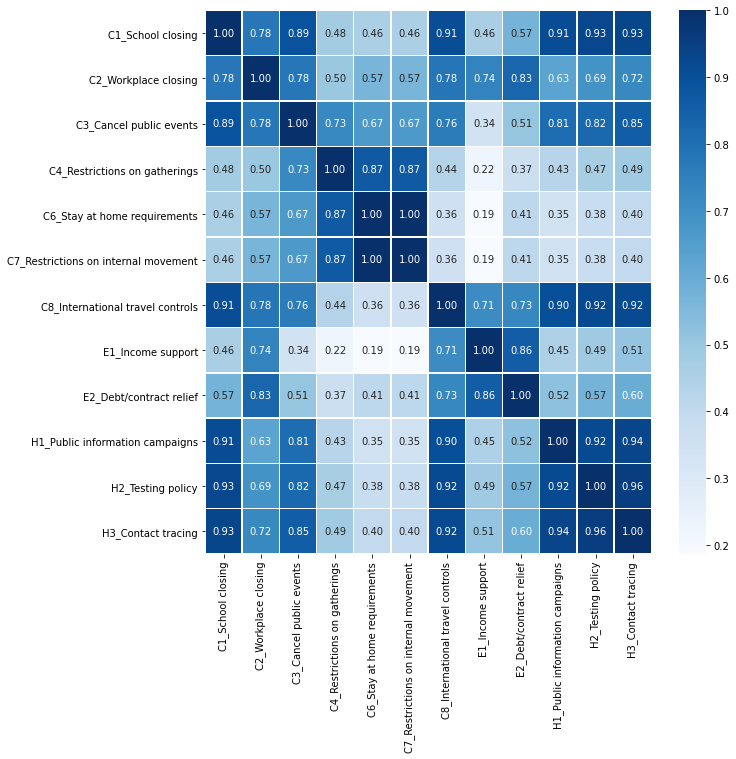

In [178]:
plt.figure(figsize=(10,10))
sns.heatmap(data = data.corr(), annot=True, 
            fmt = '.2f', linewidth=.5, cmap='Blues'
           )
